# Simple Linear Regression

The equation for simple linear regression is typically written as:

$y = b_0 + b_1x$

where
* $y$ is the estimated or predicted value of the dependent variable (response variable),
* $b_0$ is the y-intercept, which represents the predicted value of $y$ when $x$ is zero,
* $b_1$ is the slope of the line, shows the average change in $y$ for a one-unit increase in $x$,
* $x$ is the independent variable, or the predictor variable.

## Calculating the Slope and the Intercept

In the following example, we will calculate the slope and the intercept of the linear equation of a simple linear regression that fits the data contained in a sample dataset.

### Load Dataset

We will use a dataset that contains data concerning house sizes is square feet and prices in $1000.

In [69]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# csv file location
url = 'https://github.com/tariqzahratahdi/MachineLearning/raw/refs/heads/main/datasets/house_price.csv'

# making dataframe from csv file
data = pd.read_csv(url)

# sort dataframe
data.sort_values('size', inplace=True, ignore_index=True)

# show dataframe
data


,size,price
0,1176,155
1,1325,204
2,1458,211
3,1550,253
4,1852,316
5,1975,277
6,1992,250
7,2259,317
8,2689,329
9,2763,360


### Caculate the Slope and the Intercept

We calculate the slope using the following formula:

${\displaystyle b_1 = r \frac{\sigma_y}{\sigma_x}}$

where
* $r$ is the correlation coefficient between the two variables $x$ and $y$,
* $\sigma_x$ is the standard deviation of the varaiable $x$,
* $\sigma_y$ is the standard deviation of the varaiable $y$.

#### Correlation Coefficient

We use the `pandas.corr()` method to calculate the correlation coefficient between two columns of a DataFrame.

In [70]:
# correlation coefficient
r = data['size'].corr(data['price'])

print(r)

0.9152490111469164


#### Standard Deviation

We use the population standard deviation.

We use the pandas `pandas.std()` method to calculate the standard deviation and set the parameter delta degrees of freedom to zeo: `ddof=0`.

Standard deviation of the response variable (price):

In [71]:
std_y = data['price'].std(ddof=0)

print(std_y)

61.34134005709364


Standard deviation of the predictor variable(size):

In [72]:
std_x = data['size'].std(ddof=0)

print(std_x)

518.1772766148666


#### Slope

We calculate the slope using the following formula:

${\displaystyle b_1 = r \frac{\sigma_y}{\sigma_x}}$


In [73]:
# calculate the slope
slope = r * (std_y / std_x)

print(slope)

0.10834631961565051


#### Intercept

We calculate the intercept using the following formula:

${\displaystyle b_0 = \bar{y} - b_1 . \bar{x}}$

where
* $\bar{y}$ is the mean of the variable $y$,
* $\bar{x}$ is the mean of the variable $x$.


In [74]:
# calculate the intercept
intercept = data['price'].mean() - slope * data['size'].mean()

print(intercept)

60.91944208376296


### Make Predictions

In [86]:
# create a dict with model predictions values
prediction_dict = {'prediction':intercept + slope * data['size']}

# create a dataframe from the dict
prediction = pd.DataFrame(prediction_dict)

# convert float to int
prediction = prediction.astype({'prediction':'int'})

# add prediction column to data
data_model = pd.concat([data, prediction], axis=1)

data_model

,size,price,prediction
0,1176,155,188
1,1325,204,204
2,1458,211,218
3,1550,253,228
4,1852,316,261
5,1975,277,274
6,1992,250,276
7,2259,317,305
8,2689,329,352
9,2763,360,360


### Visualization

The following figure shows a scatter plot of price data versus size data, and a line plot of the linear regression line.

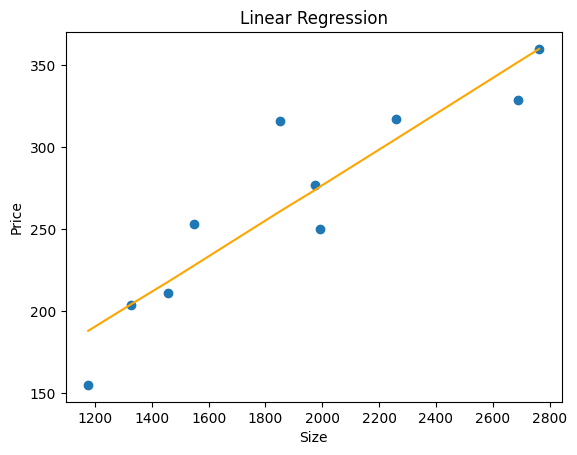

In [87]:
# create figure and axes
fig, ax = plt.subplots()
ax.set_title('Linear Regression')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

# scatter plot
ax.scatter(data['size'], data['price'])

# plot linear regression line
ax.plot(data_model['size'], data_model['prediction'], color='orange')

# show plot
plt.show()

### Perform Linear Regression Using NumPy

We use `numpy.polyfit()` function to calculate the slope ($b_1$) and intercept ($b_0$) of the regression line.

`numpy.polyfit()` performs a least-squares polynomial fit to data points.

It takes $x$ and $y$ coordinates of data points and a desired polynomial degree as input and returns the coefficients of the fitted polynomial.

*Syntax:*

`np.polyfit(x, y, deg)`

*Parameters:*

* `x`: The x-coordinates of the data points.
* `y`: The y-coordinates of the data points.
* `deg`: The degree of the polynomial to fit. For example, `deg=1` for a linear fit, `deg=2` for a quadratic fit, and so on.

*Output:*

It returns an array of coefficients `p` for the polynomial, ordered from the highest degree term to the lowest degree term (e.g., for a degree 2 polynomial, `p[0]` is the coefficient of $x^{2}$, `p[1]` is the coefficient of $x$, and `p[2]` is the constant term).

In [88]:
# calculate slope and intercept
slope, intercept = np.polyfit(data['size'], data['price'], 1)

print('slope: ', slope)
print('intercept: ', intercept)

slope:  0.10834631961565047
intercept:  60.91944208376315


## Statistical Metrics

### Mean Squared Error

Mean Squared Error (MSE) is a statistical metric that measures the average of the squared differences between predicted and actual values in a model or dataset.

A lower MSE indicates a better fit, meaning the model's predictions are closer to the true values.

It's calculated by summing the squared errors and dividing by the total number of data points, and it penalizes large errors more heavily than small errors.

The formula for Mean Squared Error is:
$$\text{MSE}=\frac{1}{n}\sum _{i=1}^{n}(\text{observed}_{i}-\text{predicted}_{i})^{2}$$
Where:
* $n$ is the number of data points.
* $\text{observed}_{i}$ is the $i$-th actual or observed value.
* $\text{predicted}_{i}$ is the $i$-th predicted value.

#### Why is it important?

* **Model comparison:** A lower MSE generally indicates a better-performing model.
* **Outlier detection:** Due to the squaring of errors, MSE is sensitive to outliers, which can highlight potential problems in the data or model.
* **Practical applications:** It's widely used in regression analysis to assess the goodness of fit of a model and to find the best-fitting regression line.

In [89]:
# calculate the squared differences
squared_differences = (data_model['price'] - data_model['prediction']) ** 2

# calculate the Mean Squared Error (MSE)
mse = squared_differences.mean()

print(mse)

614.6
